**Q1. Problem Statement: Gradient Boosting and XGBoost**<br>
Write a Python program that reads the bank_data.csv (provided on LMS) file into a DataFrame, the following are the tasks that are to be done while constructing Gradient Boosting and XGBoost model, and compare their accuracy.
1.	Load the given dataset into a DataFrame
2.	Find missing values and treat them 
3.	Observe distribution of target variable (‘y’ is our target variable)
4.	Check data types for all features
5.	Do label encoding for all categorical features
6.	Extract independent and dependent variables into the x & y DataFrame
7.	Split your data into train and test, by 30% as test size
8.	Build a Gradient boosting classifier model and XGBoost model and compare their accuracy



**Step-1:** Import required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

**Step-2:**  Load Given dataset into dataframe.

In [2]:
data=pd.read_csv('bank_data.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Step-3:**  Visulize the shape of dataset.

In [3]:
data.shape

(41188, 21)

**Step-4:**  General discription of catagirical features.

In [4]:
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


**Step-5:**  General discription of numeric features.

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Step-6:**  Missing value analysis.

In [6]:
pd.DataFrame({'Count':data.isnull().sum(),'Percentage':data.isnull().sum()/data.shape[0]}) # no missing value found 

,Count,Percentage
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0
day_of_week,0,0.0


**Step-7:**  Distribution Of Target Variable

In [7]:
target_ratio = pd.DataFrame({'Counts':data.y.value_counts(),'Percentage':data.y.value_counts()/len(data)})
target_ratio

,Counts,Percentage
y,,
no,36548,0.887346
yes,4640,0.112654


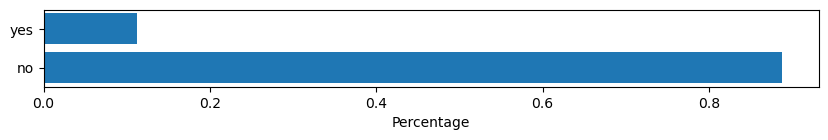

In [8]:
plt.figure(figsize = (10,1))
plt.barh(target_ratio.index, target_ratio.Percentage)
plt.xlabel('Percentage')
plt.show()

**Step-8:**  Do label encoding for every catagorical feature.

In [9]:
lb=LabelEncoder()
data.y=lb.fit_transform(data.y)

In [10]:
lb=LabelEncoder()
data.job=lb.fit_transform(data.job)
data.marital = lb.fit_transform(data.marital)
data.education = lb.fit_transform(data.education)
data.default = lb.fit_transform(data.default)
data.housing = lb.fit_transform(data.housing)
data.loan = lb.fit_transform(data.loan)
data.contact = lb.fit_transform(data.contact)
data.poutcome = lb.fit_transform(data.poutcome)
data.day_of_week = lb.fit_transform(data.day_of_week)
data.month = lb.fit_transform(data.month)


In [11]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


**Step-9:**  Seprate dependent and independent feature into X and y. 

In [12]:
X=data.drop(['y'],axis=1)
y=data.y

**Step-10:** Split data into train and test.

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=2,test_size=0.3)

**Step-11:**  Build a Gradient boosting classifier model.

In [14]:
gb_clf=GradientBoostingClassifier(learning_rate=0.5,n_estimators=1000)
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_test)
print("GradientBoostingClassifier score:",round(accuracy_score(y_test,gb_pred),3))

GradientBoostingClassifier score: 0.907


**Step-12:**  Build a XG boost classifier model.

In [15]:
#XG boost
from xgboost import XGBClassifier

xb_clf=XGBClassifier(learning_rate=0.25,n_estimators=100)
xb_clf.fit(X_train,y_train)
xb_pred=xb_clf.predict(X_test)


In [16]:
print("XG Boost Classifier score:",(round(accuracy_score(y_test,xb_pred),3)))

XG Boost Classifier score: 0.913
